---

# **Feature engineering: predykcja odwrotności cen BMW**
# **Elementy pipeline'u do projektu "Projekt własny - predykcja cen BMW":**

*   **EDA (exploratory data analysis) oraz czyszczenie danych**

*   **wstępne przetwarzanie danych**

---







In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import bibliotek

import numpy as np
import pandas as pd
import scipy.stats
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import os

In [3]:
#wczytanie pliku do ramki danych

bmw=pd.read_csv('/content/drive/MyDrive/projekt_wlasny/bmw.csv')

In [4]:
#podgląd pliku

bmw

,Unnamed: 0,price,year,mileage,engine,age
0,1,256000,2022,5,1998.0,1
1,2,184999,2019,79400,1998.0,4
2,3,74000,2014,240000,1995.0,9
3,4,168600,2022,2,1499.0,1
4,5,209999,2020,28000,2998.0,3
...,...,...,...,...,...,...
683,684,26900,2009,255000,1995.0,14
684,685,229900,2020,161000,2993.0,3
685,686,285000,2022,1,1995.0,1
686,687,285000,2022,1,1995.0,1


In [39]:
#zastępujemy cenę odwrotnością ceny
bmw.price = 1/bmw.price

In [40]:
bmw

,price,mileage,engine,age
0,0.000004,5,1998.0,1
1,0.000005,79400,1998.0,4
2,0.000014,240000,1995.0,9
3,0.000006,2,1499.0,1
4,0.000005,28000,2998.0,3
...,...,...,...,...
683,0.000037,255000,1995.0,14
684,0.000004,161000,2993.0,3
685,0.000004,1,1995.0,1
686,0.000004,1,1995.0,1


In [7]:
#typy danych: mamy tylko liczbowe

bmw.dtypes

Unnamed: 0      int64
price         float64
year            int64
mileage         int64
engine        float64
age             int64
dtype: object

In [8]:
#opis pliku (w tak wykonanym poleceniu zostaną opisane tylko dane liczbowe, ale w trym przypadku tylko takie mamy)

bmw.describe()

,Unnamed: 0,price,year,mileage,engine,age
count,688.000000,688.000000,688.000000,688.000000,676.000000,688.000000
mean,344.500000,0.000015,2015.829942,115575.148256,2355.103550,7.170058
std,198.752778,0.000018,6.057356,103749.855963,723.598604,6.057356
min,1.000000,0.000001,1987.000000,1.000000,647.000000,0.000000
25%,172.750000,0.000004,2012.000000,4275.000000,1995.000000,1.000000
50%,344.500000,0.000008,2017.000000,100400.000000,1995.000000,6.000000
75%,516.250000,0.000018,2022.000000,203929.250000,2993.000000,11.000000
max,688.000000,0.000204,2023.000000,460000.000000,5379.000000,36.000000



Funkcja describe() wykonana osobno dla każdej zmiennej numerycznej pokazuje kolejno:

* count -zliczenia
* mean - średnią
* std -odchylenie standardowe
* min -minimum
* 25% -dolny kwartyl
* 50% -mediana
* 75% -górny kwadrtyl
* max -maksimum



In [9]:
#braki danych

bmw.columns[bmw.isna().sum(axis=0) > 0]

Index(['engine'], dtype='object')

In [ ]:
#histogramy

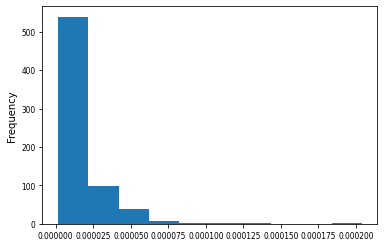

In [10]:
bmw.price.plot.hist(fontsize = 7.5)

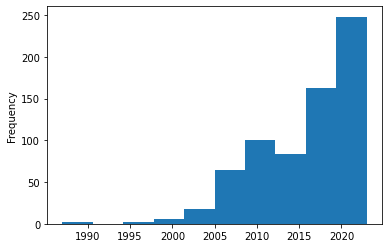

In [11]:
bmw.year.plot.hist()

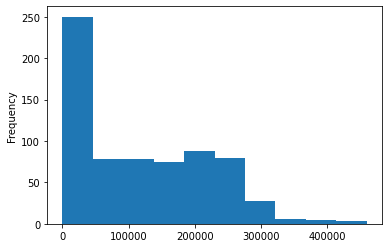

In [12]:
bmw.mileage.plot.hist()

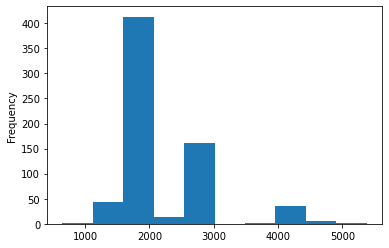

In [13]:
bmw.engine.plot.hist()

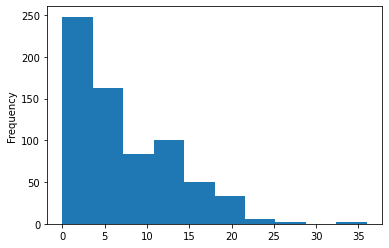

In [14]:
bmw.age.plot.hist()

# Kurtoza i skośność

*(żródło: https://www.ibm.com/docs/pl/spss-statistics/SaaS?topic=descriptives-options)*

**Rozkład:** Kurtoza i skośność są to statystyki charakteryzujące kształt i symetrię rozkładu. Te statystyki wyświetlane są wraz ze swoimi błędami standardowymi.

**Kurtoza:** Miara zakresu, do którego występują wartości odstające. W przypadku rozkładu normalnego wartość statystyki kurtozy wynosi zero. Kurtoza dodatnia wskazuje, że w danych istnieje więcej dodatnich wartości odstających niż w przypadku rozkładu normalnego. Kurtoza ujemna wskazuje, że w danych istnieje mniej dodatnich wartości odstających niż w przypadku rozkładu normalnego.

**Skośność:** Miara asymetrii rozkładu. Rozkład normalny jest symetryczny i ma skośność równą 0. Rozkład z dużą skośnością dodatnią ma długi ogon prawostronny. Gdy zaś współczynnik skośności jest ujemny, rozkład ma długi kraniec z lewej strony. Jako wytyczna, wartość skośności przekraczająca dwukrotnie swój błąd standardowy na ogół oznacza odstępstwo od symetrii rozkładu.

Zobaczmy co można powiedzieć o rozkładzie np. cen na podstawie kurtozy i skośności:

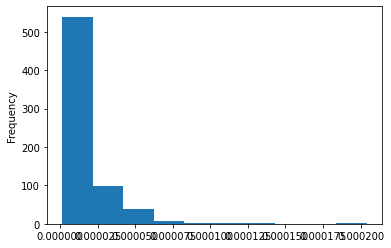

In [15]:
bmw.price.plot.hist()

In [16]:
scipy.stats.kurtosis(bmw['price'])

24.005379361376608

Kurtoza jest dodatnia, zatem istnieje więcej dodatnich wartości odstających niż w przypadku rozkładu normalnego (wysokie ceny odstające).

In [17]:
scipy.stats.skew(bmw['price'])

3.67566087057932

Widać dodatnią skośność, zatem wykres posiada ogon prawostronny, co znajduje potwierdzenie na histogramie.

In [18]:
#kasowanie niepotrzebnych danych: kolumny year powiązanej z kolumną 'age', oraz kolumny 'Unnamed: 0'

bmw.drop(['year', 'Unnamed: 0'], axis=1 ,inplace=True)

In [19]:
bmw

,price,mileage,engine,age
0,0.000004,5,1998.0,1
1,0.000005,79400,1998.0,4
2,0.000014,240000,1995.0,9
3,0.000006,2,1499.0,1
4,0.000005,28000,2998.0,3
...,...,...,...,...
683,0.000037,255000,1995.0,14
684,0.000004,161000,2993.0,3
685,0.000004,1,1995.0,1
686,0.000004,1,1995.0,1


In [ ]:
#zastąpienie brakujących danych numerycznych średnią

In [20]:
bmw.columns[bmw.isna().sum(axis=0) > 0]

Index(['engine'], dtype='object')

In [21]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(bmw[['engine']])
bmw['engine'] = imputer.transform(bmw[['engine']])

In [22]:
bmw.columns[bmw.isna().sum(axis=0) > 0]

Index([], dtype='object')

In [ ]:
#odstające dane (powyżej 98%)

In [23]:
print("98% samochodów ma przebieg niższy niż {0: .2f}".format(np.percentile(bmw.mileage, 98)))
mileage = bmw[(bmw.mileage <= np.percentile(bmw.mileage, 98)) & (bmw.mileage > 0)]

98% samochodów ma przebieg niższy niż  318379.40


In [24]:
print("98% samochodów ma silnik mniejszy niż {0: .2f}".format(np.percentile(bmw.engine, 98)))
engine = bmw[(bmw.engine <= np.percentile(bmw.engine, 98)) & (bmw.engine > 0)]

98% samochodów ma silnik mniejszy niż  4395.00


In [25]:
print("98% samochodów ma wiek niższy niż {0: .2f}".format(np.percentile(bmw.age, 98)))
age = bmw[(bmw.age <= np.percentile(bmw.age, 98)) & (bmw.age > 0)]

98% samochodów ma wiek niższy niż  20.00


In [ ]:
#zależnosci pomiędzy cechami modelu w stosunku do ceny: macierze korelacji

Współczynnik korelacji ([-1,1]) określa, jaka jest zależność pomiędzy dwoma zmiennymi. Im wyższa jest wartość bezwzględna tego współczynnika, tym zmienne silniej od siebie zależą.

Sprawdźmy więc jak zależy cena samochodów od wieku, przebiegu i silnika.

In [26]:
price_age = np.corrcoef(bmw['price'], bmw['age'])
price_age

array([[1.        , 0.75563248],
       [0.75563248, 1.        ]])

In [27]:
price_mileage = np.corrcoef(bmw['price'], bmw['mileage'])
price_mileage

array([[1.        , 0.63699504],
       [0.63699504, 1.        ]])

In [28]:
price_engine = np.corrcoef(bmw['price'], bmw['engine'])
price_engine

array([[ 1.       , -0.1009598],
       [-0.1009598,  1.       ]])

Cena najbardziej powiązana jest z wiekiem, najmniej z silnikiem.

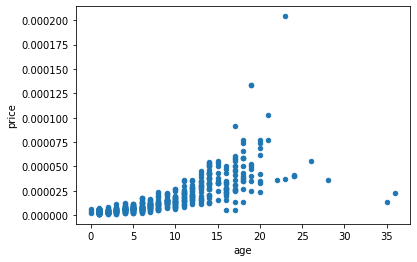

In [29]:
bmw.plot.scatter(x='age', y='price')

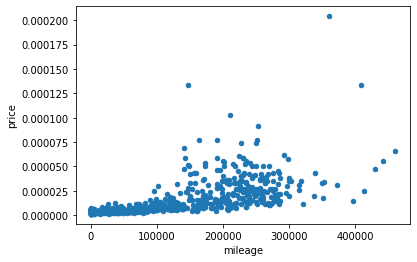

In [30]:
bmw.plot.scatter(x='mileage', y='price')

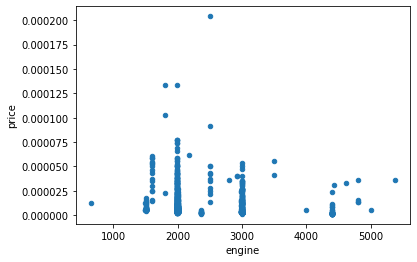

In [31]:
bmw.plot.scatter(x='engine', y='price')

In [32]:
bmw

,price,mileage,engine,age
0,0.000004,5,1998.0,1
1,0.000005,79400,1998.0,4
2,0.000014,240000,1995.0,9
3,0.000006,2,1499.0,1
4,0.000005,28000,2998.0,3
...,...,...,...,...
683,0.000037,255000,1995.0,14
684,0.000004,161000,2993.0,3
685,0.000004,1,1995.0,1
686,0.000004,1,1995.0,1


In [36]:
os.makedirs('folder/subfolder', exist_ok=True)  
bmw.to_csv('/content/drive/MyDrive/projekt_wlasny/bmw_preproc_fe.csv', index=False)